# Turkiye Population and Crime Rates Data Review

In this project, I will create maps by combining GADM's map data with TUIK's Census Data and Crime Data.

In [119]:
import pandas as pd
import json
import requests
import openpyxl
import geopandas as gpd
from unidecode import unidecode
import matplotlib.pyplot as plt
import mapclassify

I downloaded the data to my local device because there was a problem with GADM's API while I was doing this project.

In [120]:
province_data = gpd.read_file(r"C:\Users\askin\Downloads\gadm41_TUR_1.json (2)\gadm41_TUR_1.json")

town_data = gpd.read_file(r"C:\Users\askin\Downloads\gadm41_TUR_2.json (2)\gadm41_TUR_2.json")

<Axes: >

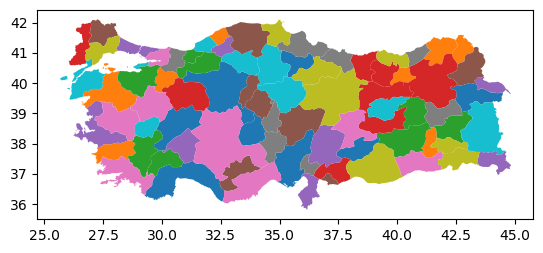

In [121]:
province_data.plot(column='NAME_1')

<Axes: >

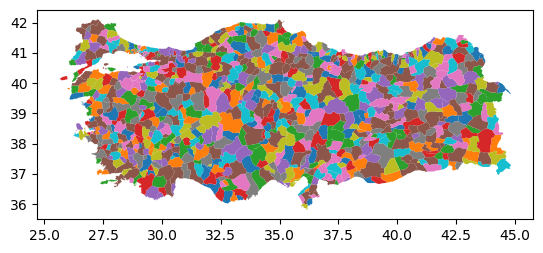

In [122]:
town_data.plot(column='NAME_2')

In [123]:
province_data

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,TUR.1_1,TUR,Turkey,Adana,Seyhan,NA,Il,Province,NA,TR.AA,TR-01,"MULTIPOLYGON (((35.41430 36.58820, 35.40850 36..."
1,TUR.2_1,TUR,Turkey,Adiyaman,Adıyaman,NA,Il,Province,NA,TR.AD,TR-02,"MULTIPOLYGON (((38.10330 37.90240, 38.14860 37..."
2,TUR.3_1,TUR,Turkey,Afyon,Afyonkarahisar,NA,Il,Province,NA,TR.AF,NA,"MULTIPOLYGON (((30.19460 37.87820, 30.20340 37..."
3,TUR.4_1,TUR,Turkey,Agri,Ağri|Karaköse,NA,Il,Province,NA,TR.AG,TR-04,"MULTIPOLYGON (((43.10200 39.32250, 43.08930 39..."
4,TUR.5_1,TUR,Turkey,Aksaray,NA,NA,Il,Province,NA,TR.AK,TR-68,"MULTIPOLYGON (((33.24950 38.26500, 33.26550 38..."
...,...,...,...,...,...,...,...,...,...,...,...,...
76,TUR.77_1,TUR,Turkey,Usak,Uşak,NA,Il,Province,NA,TR.US,TR-64,"MULTIPOLYGON (((29.41220 38.25930, 29.38200 38..."
77,TUR.78_1,TUR,Turkey,Van,NA,NA,Il,Province,NA,TR.VA,TR-65,"MULTIPOLYGON (((43.53410 37.71950, 43.52540 37..."
78,TUR.79_1,TUR,Turkey,Yalova,NA,NA,Il,Province,NA,TR.YL,TR-77,"MULTIPOLYGON (((29.03710 40.53330, 29.01580 40..."
79,TUR.80_1,TUR,Turkey,Yozgat,NA,NA,Il,Province,NA,TR.YZ,TR-66,"MULTIPOLYGON (((35.47180 39.18680, 35.46700 39..."


As you can see below, there are some spelling errors in the data, and since these errors will cause problems in matching the map with TUIK data, I am correcting the errors manually.

In [124]:
province_data['NAME_1'].unique()

array(['Adana', 'Adiyaman', 'Afyon', 'Agri', 'Aksaray', 'Amasya',
       'Ankara', 'Antalya', 'Ardahan', 'Artvin', 'Aydin', 'Balikesir',
       'Bartın', 'Batman', 'Bayburt', 'Bilecik', 'Bingöl', 'Bitlis',
       'Bolu', 'Burdur', 'Bursa', 'Çanakkale', 'Çankiri', 'Çorum',
       'Denizli', 'Diyarbakir', 'Düzce', 'Edirne', 'Elazığ', 'Erzincan',
       'Erzurum', 'Eskisehir', 'Gaziantep', 'Giresun', 'Gümüshane',
       'Hakkari', 'Hatay', 'Iğdır', 'Isparta', 'Istanbul', 'Izmir',
       'K.Maras', 'Karabük', 'Karaman', 'Kars', 'Kastamonu', 'Kayseri',
       'Kilis', 'Kinkkale', 'Kirklareli', 'Kirsehir', 'Kocaeli', 'Konya',
       'Kütahya', 'Malatya', 'Manisa', 'Mardin', 'Mersin', 'Mugla', 'Mus',
       'Nevsehir', 'Nigde', 'Ordu', 'Osmaniye', 'Rize', 'Sakarya',
       'Samsun', 'Sanliurfa', 'Siirt', 'Sinop', 'Sirnak', 'Sivas',
       'Tekirdag', 'Tokat', 'Trabzon', 'Tunceli', 'Usak', 'Van', 'Yalova',
       'Yozgat', 'Zinguldak'], dtype=object)

First, I completely remove Turkish characters.

In [125]:
province_data['NAME_1'] = province_data['NAME_1'].apply(lambda x: unidecode(x))

province_data['NAME_1'].unique()

array(['Adana', 'Adiyaman', 'Afyon', 'Agri', 'Aksaray', 'Amasya',
       'Ankara', 'Antalya', 'Ardahan', 'Artvin', 'Aydin', 'Balikesir',
       'Bartin', 'Batman', 'Bayburt', 'Bilecik', 'Bingol', 'Bitlis',
       'Bolu', 'Burdur', 'Bursa', 'Canakkale', 'Cankiri', 'Corum',
       'Denizli', 'Diyarbakir', 'Duzce', 'Edirne', 'Elazig', 'Erzincan',
       'Erzurum', 'Eskisehir', 'Gaziantep', 'Giresun', 'Gumushane',
       'Hakkari', 'Hatay', 'Igdir', 'Isparta', 'Istanbul', 'Izmir',
       'K.Maras', 'Karabuk', 'Karaman', 'Kars', 'Kastamonu', 'Kayseri',
       'Kilis', 'Kinkkale', 'Kirklareli', 'Kirsehir', 'Kocaeli', 'Konya',
       'Kutahya', 'Malatya', 'Manisa', 'Mardin', 'Mersin', 'Mugla', 'Mus',
       'Nevsehir', 'Nigde', 'Ordu', 'Osmaniye', 'Rize', 'Sakarya',
       'Samsun', 'Sanliurfa', 'Siirt', 'Sinop', 'Sirnak', 'Sivas',
       'Tekirdag', 'Tokat', 'Trabzon', 'Tunceli', 'Usak', 'Van', 'Yalova',
       'Yozgat', 'Zinguldak'], dtype=object)

As you can see up there; "Kirikkale" and "Zonguldak" are miss-written and also a short version of "Kahramanmaras" is preffered. I will fix them manually to avoid any problem.

In [126]:
province_data['NAME_1'] = province_data['NAME_1'].replace({'Kinkkale': 'Kirikkale', 'Zinguldak': 'Zonguldak', 'K.Maras' : 'Kahramanmaras'})

province_data['NAME_1'] = sorted(province_data['NAME_1'])

province_data['NAME_1'].unique()

array(['Adana', 'Adiyaman', 'Afyon', 'Agri', 'Aksaray', 'Amasya',
       'Ankara', 'Antalya', 'Ardahan', 'Artvin', 'Aydin', 'Balikesir',
       'Bartin', 'Batman', 'Bayburt', 'Bilecik', 'Bingol', 'Bitlis',
       'Bolu', 'Burdur', 'Bursa', 'Canakkale', 'Cankiri', 'Corum',
       'Denizli', 'Diyarbakir', 'Duzce', 'Edirne', 'Elazig', 'Erzincan',
       'Erzurum', 'Eskisehir', 'Gaziantep', 'Giresun', 'Gumushane',
       'Hakkari', 'Hatay', 'Igdir', 'Isparta', 'Istanbul', 'Izmir',
       'Kahramanmaras', 'Karabuk', 'Karaman', 'Kars', 'Kastamonu',
       'Kayseri', 'Kilis', 'Kirikkale', 'Kirklareli', 'Kirsehir',
       'Kocaeli', 'Konya', 'Kutahya', 'Malatya', 'Manisa', 'Mardin',
       'Mersin', 'Mugla', 'Mus', 'Nevsehir', 'Nigde', 'Ordu', 'Osmaniye',
       'Rize', 'Sakarya', 'Samsun', 'Sanliurfa', 'Siirt', 'Sinop',
       'Sirnak', 'Sivas', 'Tekirdag', 'Tokat', 'Trabzon', 'Tunceli',
       'Usak', 'Van', 'Yalova', 'Yozgat', 'Zonguldak'], dtype=object)

Now, we will do the same operations to Town Data.

In [127]:
town_data['NAME_2'].unique()

array(['Aladağ', 'Ceyhan', 'Feke', 'İmamoğlu', 'Karaisali', 'Karataş',
       'Kozan', 'Pozantı', 'Saimbeyli', 'Seyhan', 'Tufanbeyli',
       'Yumurtalık', 'Yüreğir', 'Besni', 'Çelikhan', 'Gerger', 'Gölbaşı',
       'Kahta', 'Merkez', 'Samsat', 'Sincik', 'Tut', 'Başmakçı', 'Bayat',
       'Bolvadin', 'Çay', 'Çobanlar', 'Dazkırı', 'Dinar', 'Emirdağ',
       'Evciler', 'Hocalar', 'İhsaniye', 'İscehisar', 'Kızılören',
       'Sandıklı', 'Sincanlı', 'Şuhut', 'Sultandağı', 'Diyadin',
       'Doğubeyazıt', 'Eleşkirt', 'Hamur', 'Patnos', 'Taşlıçay', 'Tutak',
       'Ağaçören', 'Eskil', 'Gülağaç', 'Güzelyurt', 'Ortaköy',
       'Sarıyahşi', 'Göynücek', 'Gümüşhacıköy', 'Hamamözü', 'Merzifon',
       'Suluova', 'Taşova', 'Akyurt', 'Altındağ', 'Ayaş', 'Bala',
       'Beypazarı', 'Çamlıdere', 'Çankaya', 'Çubuk', 'Elmadağ',
       'Etimesgut', 'Evren', 'Güdül', 'Haymana', 'Kalecik', 'Kazan',
       'Keçiören', 'Kızılcahamam', 'Mamak', 'Nallıhan', 'Polatlı',
       'Sincan', 'ŞultanKoçhisar', 'Yenim

In [128]:
town_data['NAME_2'] = town_data['NAME_2'].apply(lambda x: unidecode(x))

town_data['NAME_2'].unique()

array(['Aladag', 'Ceyhan', 'Feke', 'Imamoglu', 'Karaisali', 'Karatas',
       'Kozan', 'Pozanti', 'Saimbeyli', 'Seyhan', 'Tufanbeyli',
       'Yumurtalik', 'Yuregir', 'Besni', 'Celikhan', 'Gerger', 'Golbasi',
       'Kahta', 'Merkez', 'Samsat', 'Sincik', 'Tut', 'Basmakci', 'Bayat',
       'Bolvadin', 'Cay', 'Cobanlar', 'Dazkiri', 'Dinar', 'Emirdag',
       'Evciler', 'Hocalar', 'Ihsaniye', 'Iscehisar', 'Kiziloren',
       'Sandikli', 'Sincanli', 'Suhut', 'Sultandagi', 'Diyadin',
       'Dogubeyazit', 'Eleskirt', 'Hamur', 'Patnos', 'Taslicay', 'Tutak',
       'Agacoren', 'Eskil', 'Gulagac', 'Guzelyurt', 'Ortakoy',
       'Sariyahsi', 'Goynucek', 'Gumushacikoy', 'Hamamozu', 'Merzifon',
       'Suluova', 'Tasova', 'Akyurt', 'Altindag', 'Ayas', 'Bala',
       'Beypazari', 'Camlidere', 'Cankaya', 'Cubuk', 'Elmadag',
       'Etimesgut', 'Evren', 'Gudul', 'Haymana', 'Kalecik', 'Kazan',
       'Kecioren', 'Kizilcahamam', 'Mamak', 'Nallihan', 'Polatli',
       'Sincan', 'SultanKochisar', 'Yenim

In [129]:
town_data['NAME_2'] = town_data['NAME_2'].replace({'SultanKochisar': 'Sultankochisar'})

town_data['NAME_2'] = sorted(town_data['NAME_2'])

town_data['NAME_2'].unique()

array(['Abana', 'Acigol', 'Acipayam', 'Adakli', 'Adalar', 'Adilcevaz',
       'Afsin', 'Agacoren', 'Agin', 'Aglasun', 'Agli', 'Ahirli', 'Ahlat',
       'Ahmetli', 'Akcaabat', 'Akcadag', 'Akcakale', 'Akcakent',
       'Akcakoca', 'Akdagmadeni', 'Akhisar', 'Akincilar', 'Akkisla',
       'Akkoy', 'Akkus', 'Akoren', 'Akpinar', 'Aksehir', 'Akseki', 'Aksu',
       'Akyaka', 'Akyazi', 'Akyurt', 'Alaca', 'Alacakaya', 'Alacam',
       'Aladag', 'Alanya', 'Alapli', 'Alasehir', 'Aliaga', 'Almus',
       'Alpu', 'Altindag', 'Altinekin', 'Altinova', 'Altinozu',
       'Altintas', 'Altinyayla', 'Altunhisar', 'Alucra', 'Amasra',
       'Anamur', 'Andirin', 'Araban', 'Arac', 'Arakli', 'Aralik',
       'Arapkir', 'Ardanuc', 'Ardesen', 'Arguvan', 'Arhavi', 'Aricak',
       'Armutlu', 'Arnavutkoy', 'Arpacay', 'Arsin', 'Artova', 'Asarcik',
       'Askale', 'Aslanapa', 'Atabey', 'Atasehir', 'Atkaracalar',
       'Avanos', 'Avcilar', 'Ayancik', 'Ayas', 'Aybasti', 'Aydincik',
       'Aydinlar', 'Aydintepe', 

I wrote the following function that pulls the TUIK Excel data from my computer and converts it into a DataFrame so that I can process the data.

In [130]:
def read_and_dataframe(file_path):
    data = pd.read_excel(file_path)
    df = pd.DataFrame(data)
    return df

In [131]:
province_census_path = r"C:\Users\askin\Downloads\Population-level1.xlsx"
town_census_path = r"C:\Users\askin\Downloads\Population-level2.xlsx"
crimetype_province_path = r"C:\Users\askin\Downloads\Crime.xlsx"

In [132]:
df_province_census = read_and_dataframe(province_census_path)
df_town_census = read_and_dataframe(town_census_path)
df_crimetype_province = read_and_dataframe(crimetype_province_path)

I wanted to print it to the screen to understand what the data looks like. As you can see, it is very messy. "TÜRKİYE İSTATİSTİK KURUMU", which should be the title of the Excel table, appears as a column name. And the data contains quite a lot of NaN values.

To better understand the data, I opened the Excel spreadsheet and compared it. There are three blocks in the Excel data we have already received: "Total", "City" and "Village". There are three columns under each block. From here I understand that the columns starting from "Unnamed: 1" to "Unnamed: 9" are my data.

When I examined Excel, I saw that the names of the three columns under each block were "Total", "Female" and "Male", respectively. According to the description of the assignment, the only part of the data in this Excel that works for me is the "Total" column under the "City" block. The column I'm talking about is the column called "Unnamed: 4" in Notebook.

Unfortunately, columns are not the only problem with data. While the Excel table was being shaped to look more beautiful, the data set became messy. There are too many rows with NaN values that don't work.

In [133]:
df_province_census

,TÜRKİYE İSTATİSTİK KURUMU,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000 GENEL NÜFUS SAYIMI VERİ TABANI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
89,Osmaniye,458782,231259,227523,311994,159335,152659,146788,71924,74864
90,Düzce,314266,161927,152339,130632,67656,62976,183634,94271,89363
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,Şehir : İl ve ilçe merkezleri sınırları içinde...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Empty lines and subheadings such as "2000 GENEL NÜFUS SAYIMI VERİ TABANI" are processed as data, and the real data I need starts from the 10th index and ends in 90th index.

To solve this problem, I will delete the first 10 rows from the data.

And to make it look more organized, I arrange the index from 1 to 81.

Finally, I rename the columns and the data is now fully usable.

Note: Since I will be doing this cleaning for 2 more tables, I made a function:

In [134]:
def data_manipulator(df, columns_to_drop, row_drop, column_rename):
    
    df = (df.drop(index = row_drop))
    
    df = df.drop(df.columns[columns_to_drop], axis=1)

    df.rename(columns=column_rename, inplace=True)

    df = df.set_index(pd.Index(range(1, len(df) + 1)))

    return df

In [135]:
df_province_census = data_manipulator(df_province_census, [1,2,3,5,6,7,8,9], [0,1,2,3,4,5,6,7,8,9,91,92,93], {'TÜRKİYE İSTATİSTİK KURUMU' : 'City', 'Unnamed: 4' : 'Census'})

In [136]:
df_province_census['City'] = df_province_census['City'].apply(lambda x: unidecode(x))

df_province_census

,City,Census
1,Adana,1397853
2,Adiyaman,338939
3,Afyon,371868
4,Agri,252309
5,Amasya,196621
...,...,...
77,Yalova,98661
78,Karabuk,157756
79,Kilis,74985
80,Osmaniye,311994


I checked if there is any miss-written words.

In [137]:
df_province_census['City'].unique()

array(['Adana', 'Adiyaman', 'Afyon', 'Agri', 'Amasya', 'Ankara',
       'Antalya', 'Artvin', 'Aydin', 'Balikesir', 'Bilecik', 'Bingol',
       'Bitlis', 'Bolu', 'Burdur', 'Bursa', 'Canakkale', 'Cankiri',
       'Corum', 'Denizli', 'Diyarbakir', 'Edirne', 'Elazig', 'Erzincan',
       'Erzurum', 'Eskisehir', 'Gaziantep', 'Giresun', 'Gumushane',
       'Hakkari', 'Hatay', 'Isparta', 'Mersin (Icel)', 'Istanbul',
       'Izmir', 'Kars', 'Kastamonu', 'Kayseri', 'Kirklareli', 'Kirsehir',
       'Kocaeli', 'Konya', 'Kutahya', 'Malatya', 'Manisa',
       'Kahramanmaras', 'Mardin', 'Mugla', 'Mus', 'Nevsehir', 'Nigde',
       'Ordu', 'Rize', 'Sakarya', 'Samsun', 'Siirt', 'Sinop', 'Sivas',
       'Tekirdag', 'Tokat', 'Trabzon', 'Tunceli', 'Sanliurfa', 'Usak',
       'Van', 'Yozgat', 'Zonguldak', 'Aksaray', 'Bayburt', 'Karaman',
       'Kirikkale', 'Batman', 'Sirnak', 'Bartin', 'Ardahan', 'Igdir',
       'Yalova', 'Karabuk', 'Kilis', 'Osmaniye', 'Duzce'], dtype=object)

In [138]:
df_province_census['City'].replace({'Mersin (Icel)' : 'Mersin'})

df_province_census['City'] = sorted(df_province_census['City'])

df_province_census['City'].unique()

array(['Adana', 'Adiyaman', 'Afyon', 'Agri', 'Aksaray', 'Amasya',
       'Ankara', 'Antalya', 'Ardahan', 'Artvin', 'Aydin', 'Balikesir',
       'Bartin', 'Batman', 'Bayburt', 'Bilecik', 'Bingol', 'Bitlis',
       'Bolu', 'Burdur', 'Bursa', 'Canakkale', 'Cankiri', 'Corum',
       'Denizli', 'Diyarbakir', 'Duzce', 'Edirne', 'Elazig', 'Erzincan',
       'Erzurum', 'Eskisehir', 'Gaziantep', 'Giresun', 'Gumushane',
       'Hakkari', 'Hatay', 'Igdir', 'Isparta', 'Istanbul', 'Izmir',
       'Kahramanmaras', 'Karabuk', 'Karaman', 'Kars', 'Kastamonu',
       'Kayseri', 'Kilis', 'Kirikkale', 'Kirklareli', 'Kirsehir',
       'Kocaeli', 'Konya', 'Kutahya', 'Malatya', 'Manisa', 'Mardin',
       'Mersin (Icel)', 'Mugla', 'Mus', 'Nevsehir', 'Nigde', 'Ordu',
       'Osmaniye', 'Rize', 'Sakarya', 'Samsun', 'Sanliurfa', 'Siirt',
       'Sinop', 'Sirnak', 'Sivas', 'Tekirdag', 'Tokat', 'Trabzon',
       'Tunceli', 'Usak', 'Van', 'Yalova', 'Yozgat', 'Zonguldak'],
      dtype=object)

After I finish cleaning the city population data, I start examining the second data, the town population data.

Again, to understand the data better, I opened Excel and started comparing.

In [139]:
df_town_census

,TÜRKİYE İSTATİSTİK KURUMU,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000 GENEL NÜFUS SAYIMI VERİ TABANI,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
949,NaN,NaN,Çilimli,NaN,7147,3717,3430
950,NaN,NaN,Gölyaka,NaN,8572,4388,4184
951,NaN,NaN,Gümüşova,NaN,12103,6101,6002
952,NaN,NaN,Kaynaşlı,NaN,9439,5270,4169



The names of the columns in Excel, starting from "Unnamed: 1" to "Unnamed: 6", are "Province", "Town", "Sub-Level", "Total", "Male", and "Female", respectively. In this case, the only columns I need are the "Unnamed: 2" and "Unnamed: 4" columns, which are the "Town" and "Total" columns. I delete all other columns except these columns.

In [140]:
df_town_census = data_manipulator(df_town_census, columns_to_drop=[0,1,3,5,6], row_drop=[0,1,2,3,4,5,6,7,8], column_rename={'Unnamed: 2' : 'Town', 'Unnamed: 4' : 'Census'})

In [141]:
df_town_census['Town'] = df_town_census['Town'].astype(str)
df_town_census['Town'] = df_town_census['Town'].apply(lambda x: unidecode(x))

df_town_census

,Town,Census
1,Yuregir,322776
2,Aladag,6674
3,Ceyhan,108602
4,Feke,4632
5,Imamoglu,30428
...,...,...
941,Cilimli,7147
942,Golyaka,8572
943,Gumusova,12103
944,Kaynasli,9439


I checked if there is any miss-written words.

In [142]:
df_town_census['Town'] = sorted(df_town_census['Town'])
df_town_census['Town'].unique()

array(['2023-05-19 00:00:00', 'Abana', 'Acigol', 'Acipayam', 'Adakli',
       'Adalar', 'Adilcevaz', 'Afsin', 'Agacoren', 'Agin', 'Aglasun',
       'Agli', 'Ahirli', 'Ahlat', 'Ahmetli', 'Akcaabat', 'Akcadag',
       'Akcakale', 'Akcakent', 'Akcakoca', 'Akdagmadeni', 'Akhisar',
       'Akincilar', 'Akkisla', 'Akkoy', 'Akkus', 'Akoren', 'Akpinar',
       'Aksehir', 'Akseki', 'Aksu', 'Akyaka', 'Akyazi', 'Akyurt', 'Alaca',
       'Alacakaya', 'Alacam', 'Aladag', 'Alanya', 'Alapli', 'Alasehir',
       'Aliaga', 'Almus', 'Alpu', 'Altindag', 'Altinekin', 'Altinova',
       'Altinozu', 'Altintas', 'Altinyayla', 'Altunhisar', 'Alucra',
       'Amasra', 'Anamur', 'Andirin', 'Araban', 'Arac', 'Arakli',
       'Aralik', 'Arapkir', 'Ardanuc', 'Ardesen', 'Arguvan', 'Arhavi',
       'Aricak', 'Armutlu', 'Arpacay', 'Arsin', 'Artova', 'Asarcik',
       'Askale', 'Aslanapa', 'Atabey', 'Atkaracalar', 'Avanos', 'Avcilar',
       'Ayancik', 'Ayas', 'Aybasti', 'Aydincik', 'Aydinlar', 'Aydintepe',
       'Ay

Now let's do the same operations for df_crimetype_province:

In [143]:
df_crimetype_province

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Sütunlar,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84
0,Satırlar,NaN,NaN,Adana-1,Adıyaman-2,Afyonkarahisar-3,Aksaray-68,Amasya-5,Ankara-6,Antalya-7,...,Yalova-77,Yozgat-66,Zonguldak-67,Çanakkale-17,Çankırı-18,Çorum-19,İstanbul-34,İzmir-35,Şanlıurfa-63,Şırnak-73
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Suç Işlenen Ile Göre Ceza Infaz Kurumuna Giren...,Suç türü:26. (Dolandırıcılık),2000.0,187,15,47,12,8,854,306,...,9,13,30,39,5,49,1887,578,20,1
4,NaN,Suç türü:36. (Orman Suçları),2000.0,61,9,17,NaN,15,3,38,...,1,16,16,21,4,14,18,21,NaN,NaN
5,NaN,Suç türü:38. (İcra İflas Kanununa Muhalefet),2000.0,581,166,1258,138,509,5192,2566,...,77,601,601,1260,190,742,5172,3346,347,21
6,NaN,Suç türü:42. (Zina),2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,"Suç türü:43. (Dövmek, Yaralamak)",2000.0,134,12,63,47,6,255,141,...,17,28,51,31,4,19,611,190,42,8
8,NaN,"Suç türü:44. (Rüşvet, İrtikap Ve Sahtecilik)",2000.0,77,1,17,8,3,133,65,...,13,9,7,17,1,15,370,77,16,16
9,NaN,Suç türü:45. (Ateşli Silahlar),2000.0,92,8,23,6,2,105,71,...,7,5,15,10,1,12,508,83,67,16


Thanks to the code below, I set the data in row 1 as the column name.

In [144]:
df_crimetype_province.columns = df_crimetype_province.iloc[0]

df_crimetype_province

,Satırlar,NaN,NaN,Adana-1,Adıyaman-2,Afyonkarahisar-3,Aksaray-68,Amasya-5,Ankara-6,Antalya-7,...,Yalova-77,Yozgat-66,Zonguldak-67,Çanakkale-17,Çankırı-18,Çorum-19,İstanbul-34,İzmir-35,Şanlıurfa-63,Şırnak-73
0,Satırlar,NaN,NaN,Adana-1,Adıyaman-2,Afyonkarahisar-3,Aksaray-68,Amasya-5,Ankara-6,Antalya-7,...,Yalova-77,Yozgat-66,Zonguldak-67,Çanakkale-17,Çankırı-18,Çorum-19,İstanbul-34,İzmir-35,Şanlıurfa-63,Şırnak-73
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Suç Işlenen Ile Göre Ceza Infaz Kurumuna Giren...,Suç türü:26. (Dolandırıcılık),2000.0,187,15,47,12,8,854,306,...,9,13,30,39,5,49,1887,578,20,1
4,NaN,Suç türü:36. (Orman Suçları),2000.0,61,9,17,NaN,15,3,38,...,1,16,16,21,4,14,18,21,NaN,NaN
5,NaN,Suç türü:38. (İcra İflas Kanununa Muhalefet),2000.0,581,166,1258,138,509,5192,2566,...,77,601,601,1260,190,742,5172,3346,347,21
6,NaN,Suç türü:42. (Zina),2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,"Suç türü:43. (Dövmek, Yaralamak)",2000.0,134,12,63,47,6,255,141,...,17,28,51,31,4,19,611,190,42,8
8,NaN,"Suç türü:44. (Rüşvet, İrtikap Ve Sahtecilik)",2000.0,77,1,17,8,3,133,65,...,13,9,7,17,1,15,370,77,16,16
9,NaN,Suç türü:45. (Ateşli Silahlar),2000.0,92,8,23,6,2,105,71,...,7,5,15,10,1,12,508,83,67,16


Now we can move on to cleaning the data. I delete rows and columns I don't need.

In [145]:
df_crimetype_province.columns = ['City' if i in [1] else col for i, col in enumerate(df_crimetype_province.columns)]

In [146]:
df_crimetype_province = data_manipulator(df_crimetype_province, columns_to_drop=[0, 2], row_drop = [0, 1, 2], column_rename={0: 'Crime Type'})

I filled NaN values with 0.

In [147]:
df_crimetype_province.fillna(0, inplace=True)

I translated Turkish characters into English.

In [148]:
df_crimetype_province.columns = [unidecode(col) for col in df_crimetype_province.columns]

The column names also included the license plate codes of the provinces. To avoid any problems, I deleted everything that wasn't a letter in the column names.

In [149]:
df_crimetype_province.columns = df_crimetype_province.columns.str.extract('([a-zA-Z]+)', expand=False)

df_crimetype_province

,City,Adana,Adiyaman,Afyonkarahisar,Aksaray,Amasya,Ankara,Antalya,Ardahan,Artvin,...,Yalova,Yozgat,Zonguldak,Canakkale,Cankiri,Corum,Istanbul,Izmir,Sanliurfa,Sirnak
1,Suç türü:26. (Dolandırıcılık),187,15,47,12,8,854,306,4,3,...,9,13,30,39,5,49,1887,578,20,1
2,Suç türü:36. (Orman Suçları),61,9,17,0,15,3,38,22,11,...,1,16,16,21,4,14,18,21,0,0
3,Suç türü:38. (İcra İflas Kanununa Muhalefet),581,166,1258,138,509,5192,2566,68,181,...,77,601,601,1260,190,742,5172,3346,347,21
4,Suç türü:42. (Zina),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"Suç türü:43. (Dövmek, Yaralamak)",134,12,63,47,6,255,141,17,8,...,17,28,51,31,4,19,611,190,42,8
6,"Suç türü:44. (Rüşvet, İrtikap Ve Sahtecilik)",77,1,17,8,3,133,65,6,2,...,13,9,7,17,1,15,370,77,16,16
7,Suç türü:45. (Ateşli Silahlar),92,8,23,6,2,105,71,3,7,...,7,5,15,10,1,12,508,83,67,16
8,Suç türü:46. (Zimmete Para Geçirmek),5,0,1,1,0,20,7,1,2,...,0,0,1,5,0,2,31,8,3,2
9,Suç türü:47. (Adam Öldürmek),159,18,48,23,21,176,101,4,8,...,11,19,31,18,10,27,429,181,56,12
10,"Suç türü:48. (Kız, Kadın Ve Erkek Kaçırmak)",17,1,12,5,5,15,43,10,3,...,3,4,5,15,2,4,57,23,1,0


Since I wanted the city names to be rows rather than columns, I transposed the data.

In [150]:
df_crimetype_province = df_crimetype_province.T

I reset the index to have a clear view.

In [151]:
df_crimetype_province = df_crimetype_province.reset_index()

I renamed the first column and I deleted first row.

In [152]:
df_crimetype_province = df_crimetype_province.rename(columns={'index':'City'})
df_crimetype_province = df_crimetype_province.drop(df_crimetype_province.index[0])
df_crimetype_province['City'] = sorted(df_crimetype_province['City'])

df_crimetype_province

,City,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,Adana,187,61,581,0,134,77,92,5,159,17,15,20,42,36,2,8,101,177,338
2,Adiyaman,15,9,166,0,12,1,8,0,18,1,5,15,3,5,0,6,12,24,13
3,Afyonkarahisar,47,17,1258,0,63,17,23,1,48,12,21,27,23,5,4,5,8,37,71
4,Agri,12,0,138,0,47,8,6,1,23,5,8,12,23,7,1,0,3,41,24
5,Aksaray,8,15,509,0,6,3,2,0,21,5,2,21,6,0,0,7,0,14,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Van,49,14,742,0,19,15,12,2,27,4,6,31,11,6,1,3,2,23,25
79,Yabanci,1887,18,5172,0,611,370,508,31,429,57,39,92,152,324,9,44,921,1384,857
80,Yalova,578,21,3346,0,190,77,83,8,181,23,50,202,67,67,10,30,171,305,438
81,Yozgat,20,0,347,0,42,16,67,3,56,1,5,9,5,10,0,3,33,16,63


The index ending at 82 caught my attention and I decided to examine the data. And fixed the "Yabanci" problem.

In [153]:
df_crimetype_province['City'].unique()

array(['Adana', 'Adiyaman', 'Afyonkarahisar', 'Agri', 'Aksaray', 'Amasya',
       'Ankara', 'Antalya', 'Ardahan', 'Artvin', 'Aydin', 'Balikesir',
       'Bartin', 'Batman', 'Bayburt', 'Bilecik', 'Bingol', 'Bitlis',
       'Bolu', 'Burdur', 'Bursa', 'Canakkale', 'Cankiri', 'Corum',
       'Denizli', 'Diyarbakir', 'Duzce', 'Edirne', 'Elazig', 'Erzincan',
       'Erzurum', 'Eskisehir', 'Gaziantep', 'Giresun', 'Gumushane',
       'Hakkari', 'Hatay', 'Igdir', 'Isparta', 'Istanbul', 'Izmir',
       'Kahramanmaras', 'Karabuk', 'Karaman', 'Kars', 'Kastamonu',
       'Kayseri', 'Kilis', 'Kirikkale', 'Kirklareli', 'Kirsehir',
       'Kocaeli', 'Konya', 'Kutahya', 'Malatya', 'Manisa', 'Mardin',
       'Mersin', 'Mugla', 'Mus', 'Nevsehir', 'Nigde', 'Ordu', 'Osmaniye',
       'Rize', 'Sakarya', 'Samsun', 'Sanliurfa', 'Siirt', 'Sinop',
       'Sirnak', 'Sivas', 'Tekirdag', 'Tokat', 'Trabzon', 'Tunceli',
       'Usak', 'Van', 'Yabanci', 'Yalova', 'Yozgat', 'Zonguldak'],
      dtype=object)

In [154]:
df_crimetype_province = df_crimetype_province.drop(79)
df_crimetype_province['City'] = df_crimetype_province['City'].replace({'Afyonkarahisar': 'Afyon'})

In [155]:
df_crimetype_province['City'].unique()

array(['Adana', 'Adiyaman', 'Afyon', 'Agri', 'Aksaray', 'Amasya',
       'Ankara', 'Antalya', 'Ardahan', 'Artvin', 'Aydin', 'Balikesir',
       'Bartin', 'Batman', 'Bayburt', 'Bilecik', 'Bingol', 'Bitlis',
       'Bolu', 'Burdur', 'Bursa', 'Canakkale', 'Cankiri', 'Corum',
       'Denizli', 'Diyarbakir', 'Duzce', 'Edirne', 'Elazig', 'Erzincan',
       'Erzurum', 'Eskisehir', 'Gaziantep', 'Giresun', 'Gumushane',
       'Hakkari', 'Hatay', 'Igdir', 'Isparta', 'Istanbul', 'Izmir',
       'Kahramanmaras', 'Karabuk', 'Karaman', 'Kars', 'Kastamonu',
       'Kayseri', 'Kilis', 'Kirikkale', 'Kirklareli', 'Kirsehir',
       'Kocaeli', 'Konya', 'Kutahya', 'Malatya', 'Manisa', 'Mardin',
       'Mersin', 'Mugla', 'Mus', 'Nevsehir', 'Nigde', 'Ordu', 'Osmaniye',
       'Rize', 'Sakarya', 'Samsun', 'Sanliurfa', 'Siirt', 'Sinop',
       'Sirnak', 'Sivas', 'Tekirdag', 'Tokat', 'Trabzon', 'Tunceli',
       'Usak', 'Van', 'Yalova', 'Yozgat', 'Zonguldak'], dtype=object)

In [156]:
df_crimetype_province = df_crimetype_province.reset_index(drop=True)
df_crimetype_province.index = df_crimetype_province.index + 1

I added a "Total" column because I need total number of crimes and I didn't the first column which is "City".

I find the total number of crimes for each city. "Total" is the only column I need, so I will delete the others.

In [157]:
df_crimetype_province['Total'] = df_crimetype_province.drop(df_crimetype_province.columns[0], axis=1).sum(axis=1)
df_crimetype_province = df_crimetype_province.drop(df_crimetype_province.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]], axis=1)

In [158]:
df_crimetype_province

,City,Total
1,Adana,2052
2,Adiyaman,313
3,Afyon,1687
4,Agri,359
5,Aksaray,628
...,...,...
77,Usak,254
78,Van,992
79,Yalova,5847
80,Yozgat,696


In the code below, I wrote a function to marge and plot the data:

In [159]:
def merge_and_plot(map_data, census_data, left_on_column, right_on_column, plot_column):
    merged_gdf = map_data.merge(census_data, how='left', left_on=f'{left_on_column}', right_on=f'{right_on_column}')
    
    fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(aspect='equal'))
    plot_merged_data = merged_gdf.plot(column=f'{plot_column}', scheme = 'Quantiles', k=5, cmap='inferno', legend=True, ax=ax)
    
    return plot_merged_data

And then, I ploted the Turkiye map with town population data:

<Axes: >

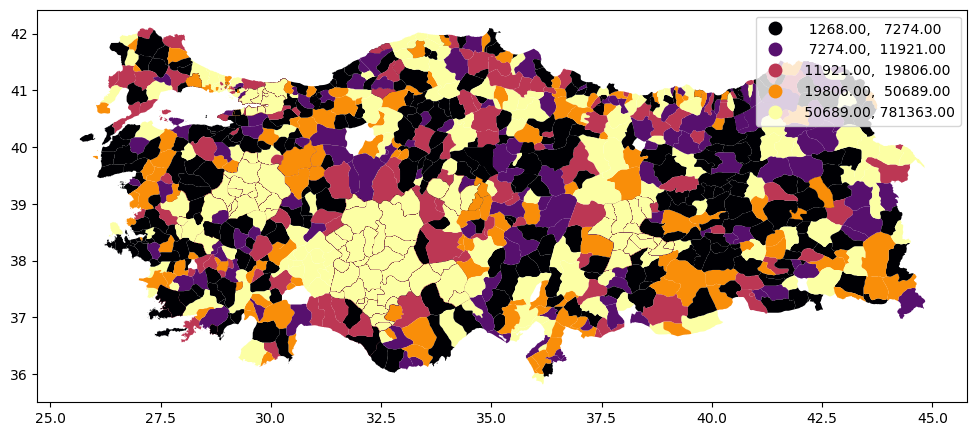

In [160]:
merge_and_plot(town_data, df_town_census, 'NAME_2', 'Town', 'Census')

 I had to merge the different datas twice bu I only need to plot the last merged data, so I made the first merge without function.

I merged Level 1 map and Province Census data:

In [161]:
merged_province_gdf = province_data.merge(df_province_census, how='left', left_on='NAME_1', right_on='City')
merged_province_gdf

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,City,Census
0,TUR.1_1,TUR,Turkey,Adana,Seyhan,NA,Il,Province,NA,TR.AA,TR-01,"MULTIPOLYGON (((35.41430 36.58820, 35.40850 36...",Adana,1397853
1,TUR.2_1,TUR,Turkey,Adiyaman,Adıyaman,NA,Il,Province,NA,TR.AD,TR-02,"MULTIPOLYGON (((38.10330 37.90240, 38.14860 37...",Adiyaman,338939
2,TUR.3_1,TUR,Turkey,Afyon,Afyonkarahisar,NA,Il,Province,NA,TR.AF,NA,"MULTIPOLYGON (((30.19460 37.87820, 30.20340 37...",Afyon,371868
3,TUR.4_1,TUR,Turkey,Agri,Ağri|Karaköse,NA,Il,Province,NA,TR.AG,TR-04,"MULTIPOLYGON (((43.10200 39.32250, 43.08930 39...",Agri,252309
4,TUR.5_1,TUR,Turkey,Aksaray,NA,NA,Il,Province,NA,TR.AK,TR-68,"MULTIPOLYGON (((33.24950 38.26500, 33.26550 38...",Aksaray,196621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,TUR.77_1,TUR,Turkey,Usak,Uşak,NA,Il,Province,NA,TR.US,TR-64,"MULTIPOLYGON (((29.41220 38.25930, 29.38200 38...",Usak,98661
77,TUR.78_1,TUR,Turkey,Van,NA,NA,Il,Province,NA,TR.VA,TR-65,"MULTIPOLYGON (((43.53410 37.71950, 43.52540 37...",Van,157756
78,TUR.79_1,TUR,Turkey,Yalova,NA,NA,Il,Province,NA,TR.YL,TR-77,"MULTIPOLYGON (((29.03710 40.53330, 29.01580 40...",Yalova,74985
79,TUR.80_1,TUR,Turkey,Yozgat,NA,NA,Il,Province,NA,TR.YZ,TR-66,"MULTIPOLYGON (((35.47180 39.18680, 35.46700 39...",Yozgat,311994


Then I mergec Province Census Density and Crime Data

In [162]:
merged_province_crime_gdf = pd.merge(merged_province_gdf, df_crimetype_province, how='left', left_on='NAME_1', right_on='City')

merged_province_crime_gdf

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,City_x,Census,City_y,Total
0,TUR.1_1,TUR,Turkey,Adana,Seyhan,NA,Il,Province,NA,TR.AA,TR-01,"MULTIPOLYGON (((35.41430 36.58820, 35.40850 36...",Adana,1397853,Adana,2052
1,TUR.2_1,TUR,Turkey,Adiyaman,Adıyaman,NA,Il,Province,NA,TR.AD,TR-02,"MULTIPOLYGON (((38.10330 37.90240, 38.14860 37...",Adiyaman,338939,Adiyaman,313
2,TUR.3_1,TUR,Turkey,Afyon,Afyonkarahisar,NA,Il,Province,NA,TR.AF,NA,"MULTIPOLYGON (((30.19460 37.87820, 30.20340 37...",Afyon,371868,Afyon,1687
3,TUR.4_1,TUR,Turkey,Agri,Ağri|Karaköse,NA,Il,Province,NA,TR.AG,TR-04,"MULTIPOLYGON (((43.10200 39.32250, 43.08930 39...",Agri,252309,Agri,359
4,TUR.5_1,TUR,Turkey,Aksaray,NA,NA,Il,Province,NA,TR.AK,TR-68,"MULTIPOLYGON (((33.24950 38.26500, 33.26550 38...",Aksaray,196621,Aksaray,628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,TUR.77_1,TUR,Turkey,Usak,Uşak,NA,Il,Province,NA,TR.US,TR-64,"MULTIPOLYGON (((29.41220 38.25930, 29.38200 38...",Usak,98661,Usak,254
77,TUR.78_1,TUR,Turkey,Van,NA,NA,Il,Province,NA,TR.VA,TR-65,"MULTIPOLYGON (((43.53410 37.71950, 43.52540 37...",Van,157756,Van,992
78,TUR.79_1,TUR,Turkey,Yalova,NA,NA,Il,Province,NA,TR.YL,TR-77,"MULTIPOLYGON (((29.03710 40.53330, 29.01580 40...",Yalova,74985,Yalova,5847
79,TUR.80_1,TUR,Turkey,Yozgat,NA,NA,Il,Province,NA,TR.YZ,TR-66,"MULTIPOLYGON (((35.47180 39.18680, 35.46700 39...",Yozgat,311994,Yozgat,696


And I calculated 'Crime Ratio' by dividing Total Crime by Census:

In [163]:
merged_province_crime_gdf['Census'] = pd.to_numeric(merged_province_crime_gdf['Census'], errors='coerce')
merged_province_crime_gdf['Total'] = pd.to_numeric(merged_province_crime_gdf['Total'], errors='coerce')

merged_province_crime_gdf['Crime Ratio'] = merged_province_crime_gdf['Total'] / merged_province_crime_gdf['Census']

In [164]:
merged_province_crime_gdf

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,City_x,Census,City_y,Total,Crime Ratio
0,TUR.1_1,TUR,Turkey,Adana,Seyhan,NA,Il,Province,NA,TR.AA,TR-01,"MULTIPOLYGON (((35.41430 36.58820, 35.40850 36...",Adana,1397853.0,Adana,2052,0.001468
1,TUR.2_1,TUR,Turkey,Adiyaman,Adıyaman,NA,Il,Province,NA,TR.AD,TR-02,"MULTIPOLYGON (((38.10330 37.90240, 38.14860 37...",Adiyaman,338939.0,Adiyaman,313,0.000923
2,TUR.3_1,TUR,Turkey,Afyon,Afyonkarahisar,NA,Il,Province,NA,TR.AF,NA,"MULTIPOLYGON (((30.19460 37.87820, 30.20340 37...",Afyon,371868.0,Afyon,1687,0.004537
3,TUR.4_1,TUR,Turkey,Agri,Ağri|Karaköse,NA,Il,Province,NA,TR.AG,TR-04,"MULTIPOLYGON (((43.10200 39.32250, 43.08930 39...",Agri,252309.0,Agri,359,0.001423
4,TUR.5_1,TUR,Turkey,Aksaray,NA,NA,Il,Province,NA,TR.AK,TR-68,"MULTIPOLYGON (((33.24950 38.26500, 33.26550 38...",Aksaray,196621.0,Aksaray,628,0.003194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,TUR.77_1,TUR,Turkey,Usak,Uşak,NA,Il,Province,NA,TR.US,TR-64,"MULTIPOLYGON (((29.41220 38.25930, 29.38200 38...",Usak,98661.0,Usak,254,0.002574
77,TUR.78_1,TUR,Turkey,Van,NA,NA,Il,Province,NA,TR.VA,TR-65,"MULTIPOLYGON (((43.53410 37.71950, 43.52540 37...",Van,157756.0,Van,992,0.006288
78,TUR.79_1,TUR,Turkey,Yalova,NA,NA,Il,Province,NA,TR.YL,TR-77,"MULTIPOLYGON (((29.03710 40.53330, 29.01580 40...",Yalova,74985.0,Yalova,5847,0.077976
79,TUR.80_1,TUR,Turkey,Yozgat,NA,NA,Il,Province,NA,TR.YZ,TR-66,"MULTIPOLYGON (((35.47180 39.18680, 35.46700 39...",Yozgat,311994.0,Yozgat,696,0.002231


I multiplied Crime Ratio column with 1000 because there was approximately 4 digits and legend parameter was showing only 2 digits. 

In [165]:
merged_province_crime_gdf['Crime Ratio'] = merged_province_crime_gdf['Crime Ratio'] * 1000

And here is the map of the Crime Ratio for per City:

<Axes: >

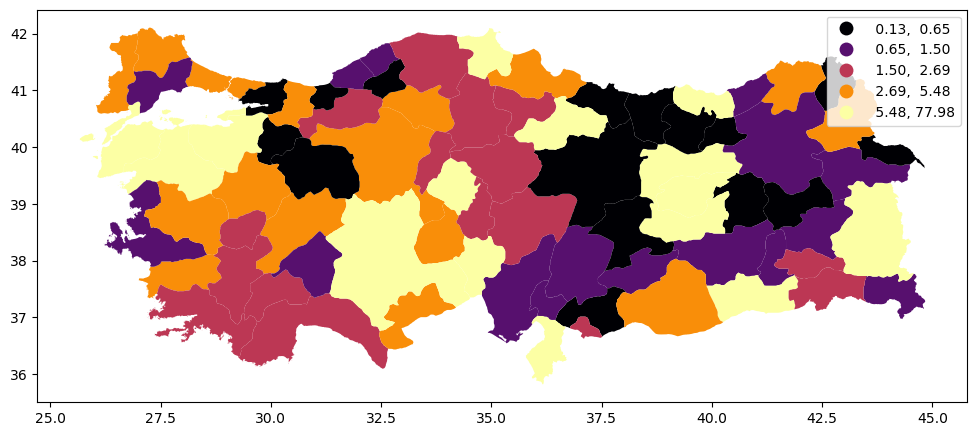

In [166]:
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(aspect='equal'))
merged_province_crime_gdf.plot(column='Crime Ratio', scheme = 'Quantiles', k=5, cmap='inferno', legend = True, ax=ax)